# Chemco Benefits

Chemco produce 3 sustancias químicas: B, C y D. Comienzan
comprando el químico A por un costo de $\$ 6/100$ litros. Por un costo adicional de $\$ 3$ y el uso de 3 horas de mano de obra calificada,
100 litros de A se pueden transformar en 40 litros de C y
60 litros de B. La sustancia química C se puede vender o procesar
más. Cuesta $\$ 1$ y requiere 1 hora de mano de obra calificada para
Procesar 100 litros de C en 60 litros de D y 40 litros de
B. Para cada producto químico el precio de venta por 100 litros y el
La cantidad máxima (en cientos de litros) que se puede vender es
dado en la Tabla 30.
Se dispone de un máximo de 200 horas de mano de obra. Formular
un LP cuya solución le dirá a Chemco cómo maximizar
su beneficio

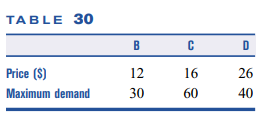

##Conjuntos

$ i = \text{Productos indexados por } i$

## Parámetros


$I_{i} = \textrm{Ingreso de vender el producto } i$

$C_{i} = \textrm{Costo de producir el producto } i$

$ CP_{ij} = \textrm{Cantidad de procesamiento del producto } i \textrm{ para el producto } j$

$ H_{i} = \textrm{Cantidad de horas de procesamiento del producto } i $

$ D_{i} = \textrm{ Máxima cantidad por producto } i$

## Variables de decisión

$ x_{i} = \textrm{Cantidad de producto } i$

## Función Objetivo

$$ \textrm{Max } z = \sum_{i = 1}^{n} I_{i}\: x_{i} - \sum_{i = 1}^{n} C_{i}\: x_{i} $$

# Restricciones

Se tiene una producción en cada producto,

$$ \sum_{i = 1}^{n} x_{i}\:  CP_{ij} = 0, \forall j $$

Hay un límite de horas laborales,

$$ \sum_{i = 1}^{n} x_{i}\:  H_{i} \leq 200$$

Hay una demanda máxima,

$$ x_{i} \leq D_{i} $$

In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 21.3 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [3]:
#Conjuntos
productos = range(5)
productos1 = range(3)

In [13]:
# Parametros

M = [10000, 30, 60, 40, 10000]

I = [0, 12, 16, 26, 0]

C = [9, 0, 1, 0, 0]

CP = [[0.4, 0, -1, 0, -1],
      [0.6, -1, 0, 0, 0.4],
      [0, 0, 0, -1, 0.6]]

H = [3, 0, 0, 0, 1]

In [16]:
# Crear la instancia del modelo
model = LpProblem(name="Chemco_Benefits", sense=LpMaximize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (productos), 0, None, LpContinuous)

# Restricciones

# Agregar la función objetivo
model += (lpSum([I[i] * X[i] for i in productos]) - lpSum([C[i] * X[i] for i in productos]))

# Agregar las restricciones

for j in productos1:
  model += lpSum([CP[j][i] * X[i] for i in productos]) == 0

model += lpSum(H[i] * X[i] for i in productos) <= 200

for i in productos:
  model += X[i] <= M[i]

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Utilidades totales = $", value(model.objective))

Status: Optimal
X_0 = 39.473684
X_1 = 30.0
X_2 = 0.0
X_3 = 9.4736842
X_4 = 15.789474
Utilidades totales = $ 251.05263319999995


In [17]:
model

Chemco_Benefits:
MAXIMIZE
-9*X_0 + 12*X_1 + 15*X_2 + 26*X_3 + 0
SUBJECT TO
_C1: 0.4 X_0 - X_2 - X_4 = 0

_C2: 0.6 X_0 - X_1 + 0.4 X_4 = 0

_C3: - X_3 + 0.6 X_4 = 0

_C4: 3 X_0 + X_4 <= 200

_C5: X_0 <= 10000

_C6: X_1 <= 30

_C7: X_2 <= 60

_C8: X_3 <= 40

_C9: X_4 <= 10000

VARIABLES
X_0 Continuous
X_1 Continuous
X_2 Continuous
X_3 Continuous
X_4 Continuous